#### Мажник Павел, 792

### ДЗ 1. Свойства оценок.
#### Задача 3. 
Придумайте распределение, у которого конечны первые
четыре момента, а пятый $-$ нет. Сгенерируйте выборку $X_1, ..., X_N$
из этого распределения для $N = 10^4.$ Постройте график плотности,
а также нанесите точки выборки на график (с нулевой
$y$-координатой). Для всех $n\leq N$ посчитайте оценку $s^2 =
s^2(X_1, ..., X_N)$ для дисперсии. Постройте график зависимости
модуля разности оценки дисперсии и ее истинного значения от $n.$
Проведите аналогичное исследование для выборки из распределения
Коши, где вместо графика модуля разности оценки дисперсии и ее
истинного значения (которого не существует) постройте график оценки
дисперсии.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

Рассмотрим распределение Парето. Его плотность распределения:  
$f_X(x) = \left\{
\begin{matrix}
\frac{kx_m^k}{x^{k+1}}, & x \ge x_m \\
0, & x < x_m
\end{matrix}
\right. = \frac{kx_m^k}{x^{k+1}} \cdot I(x \ge x_m) = [\text{при } x_m = 1] = \frac{k}{x^{k+1}} \cdot I(x \ge 1)$.  
Посчитаем момент:
$\mathbb{E}\left[X^n\right] = \int\limits_{-\infty}^{\infty}\!x^n\, f(x) dx = \int\limits_{1}^{\infty}\!k x^{n - k - 1} dx = \dfrac{k}{k - n}.$  
Отсюда видно, что при $n < k$ моменты будут конечны, а при $n = k$ нет. Поэтому выберем $k = 5,$ тогда условие задачи будет справедливо для распределения $\frac{5}{x^{6}} \cdot I(x \ge 1).$  
Сгенерируем выборку из такого распределения.

In [3]:
N = 10 ** 4
theta = 1

# Сгенерируем выборку:
sample = pareto.rvs(5, size=N)
print("Sample:", sample)

Sample: [1.21842831 1.04281606 1.57770329 ... 1.12775611 1.33933695 1.12267614]


Построим график плотности:

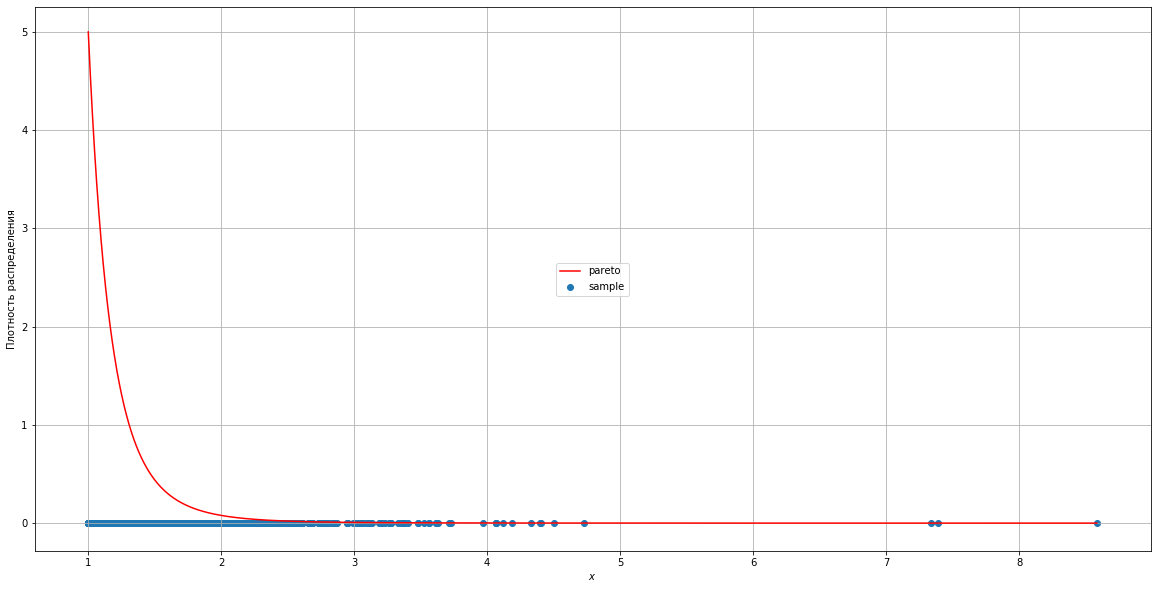

In [49]:
plt.figure(figsize=(20, 10))
x = np.linspace(sample.min(), sample.max(), N)
plt.plot(x, pareto.pdf(x, 5), 'r', label='pareto')
plt.scatter(sample, np.zeros(N), label='sample')
plt.ylabel('Плотность распределения')
plt.xlabel(r'$x$')
plt.legend(loc=10)
plt.grid()
plt.show()

Посчитаем дсперсию нашего распределения:  
$D[X] = E[X^2] - E[X]^2 = \frac{5}{5 - 2} - \left(\frac{5}{5 - 1}\right)^2 = \frac{5}{48}.$  
Её оценка $s^2 = \overline{X^2} - (\overline{X})^2.$  
Построим график зависимости модуля разности оценки дисперсии и ее истинного значения от $𝑛$.

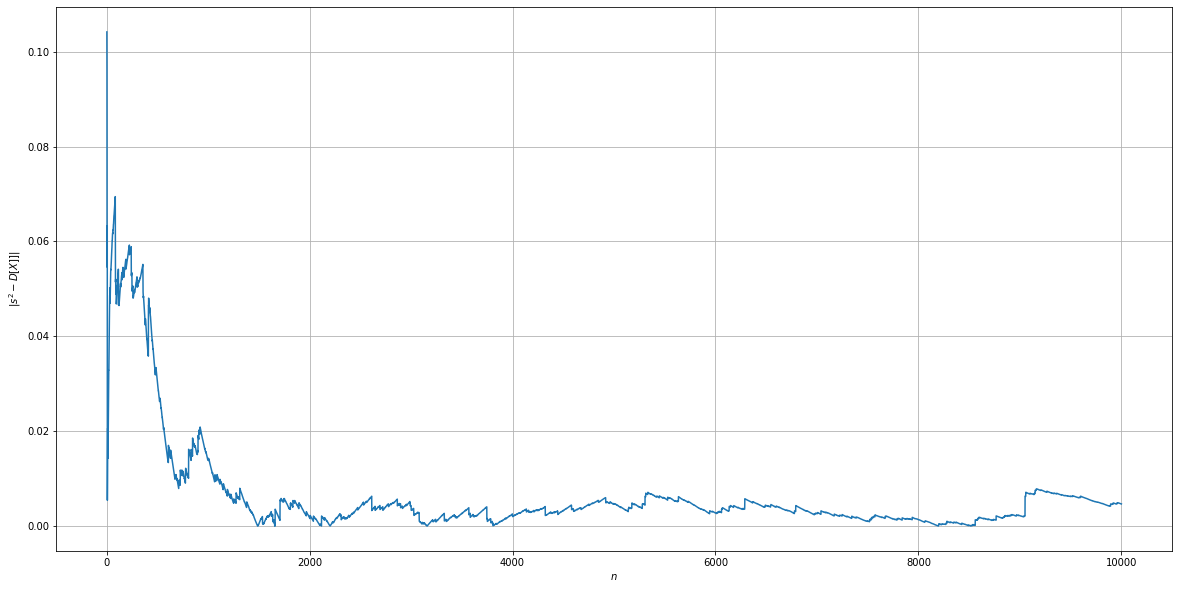

In [38]:
d_exact = 5. / 48
# Для всех n <= N посчитаем оценку дисперсии
s2_est = np.array([np.mean(sample[:n] ** 2) - np.mean(sample[:n]) ** 2 for n in range(N)])
plt.figure(figsize=(20, 10))
plt.plot(range(1, N + 1), np.abs(s2_est - d_exact))
plt.xlabel(r'$n$')
plt.ylabel(r'$|s^2 -D[X]]|$')
plt.grid()
plt.show()

Мы видим, что модуль разности оценки дисперсии и её истинного значения стремится к нулю.  
Это совпадает с состоятельностью оценки $s^2$.

### Проведем аналогичное исследование для выборки из распределения Коши

In [59]:
from scipy.stats import cauchy
sample2 = cauchy.rvs(size=N)

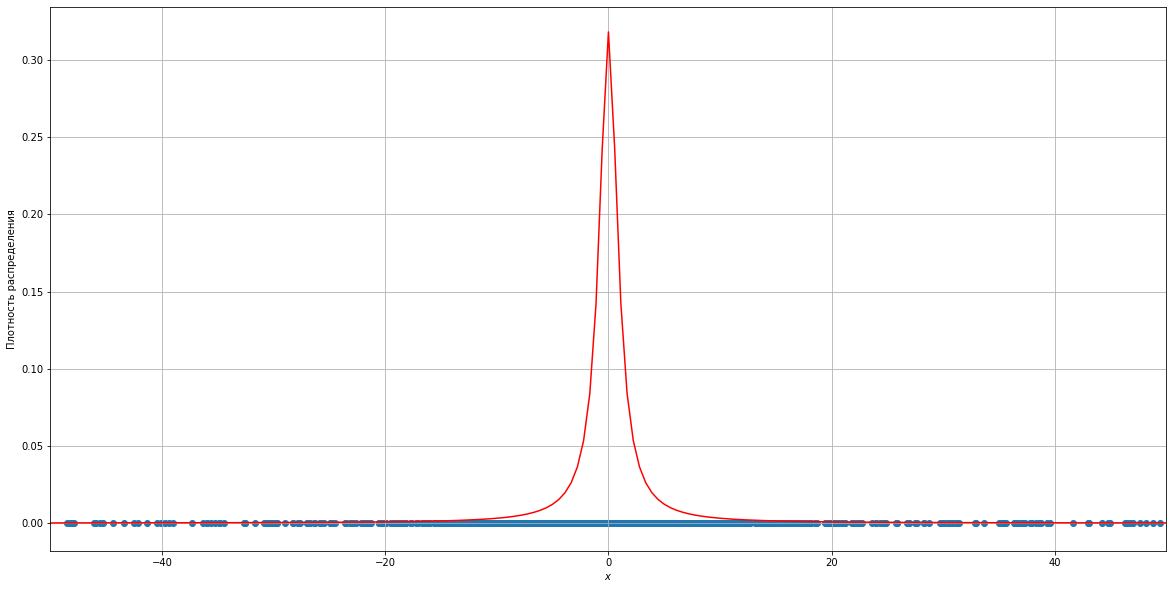

In [60]:
plt.figure(figsize=(20, 10))
x = np.linspace(sample2.min(), sample2.max(), N)
plt.plot(x, cauchy.pdf(x), 'r', label='cauchy')
plt.scatter(sample2, np.zeros(N), label='sample')
plt.ylabel('Плотность распределения')
plt.xlabel(r'$x$')
plt.xlim((-50, 50))
plt.grid()
plt.show()

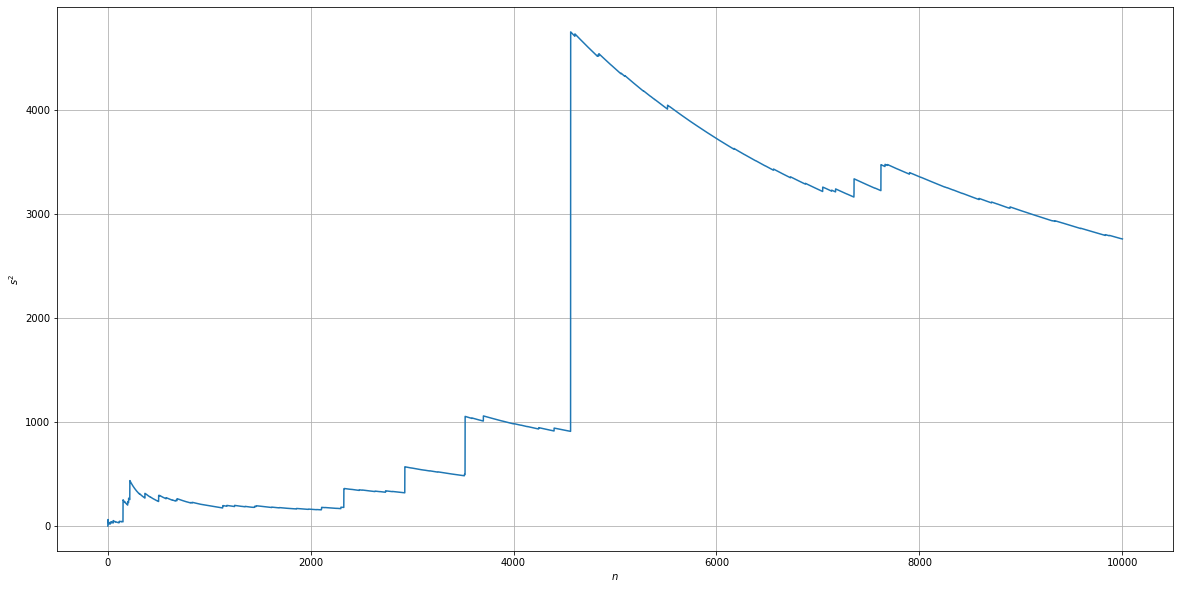

In [61]:
s2_est = np.array([np.mean(sample2[:n] ** 2) - np.mean(sample2[:n]) ** 2 for n in range(N)])
plt.figure(figsize=(20, 10))
plt.plot(range(1, N + 1), s2_est)
plt.xlabel(r'$n$')
plt.ylabel(r'$s^2$')
plt.grid()
plt.show()

Из графика видим, что оценка дисперсии не сходится к какой-либо величине. Это совпадает с тем, что данное распределение не имеет дисперсии (не существует моментов).